### Import PastequeFlow

In [1]:
import tensorflow as tf
import numpy as np
print(f"⭐ Using TensorFlow {tf.__version__} and Numpy {np.__version__}!")

import pastequeflow.classification as pf

from pathlib import Path
import matplotlib.pyplot as plt

for device in tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(device, True)

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

tf.config.list_physical_devices()

⭐ Using TensorFlow 2.4.1 and Numpy 1.19.2!
-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------
🍉 Welcome to PastequeFlow!
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: GeForce RTX 2060 SUPER, compute capability 7.5


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Some constants

In [2]:
data_dir = Path("./data")

#train_dir = data_dir / "train"
train_csv = data_dir / "train.csv"
#test_dir = data_dir / "test"
test_csv = data_dir / "test.csv"

x_col = "image"
y_col = "char"

### Instantiate the data source

In [3]:
data_source = pf.data_sources.CSVLoader(
    train_csv_path=train_csv,
    train_base_path="data/",
    x_col=x_col,
    y_col=y_col,
    validation_split=.08,
    test_csv_path=test_csv
)

#data_source.weights

7000 files loaded from the training dataset!
👉 The y column ("char") was not found in the testing csv, so it will be omitted!


### Visualize the data

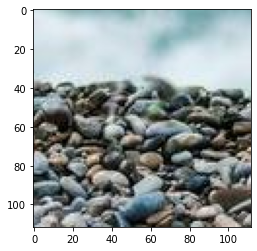

f
tf.Tensor(15, shape=(), dtype=int64)


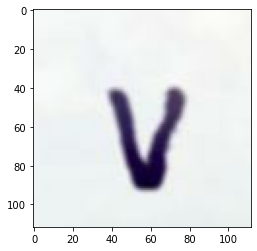

v
tf.Tensor(31, shape=(), dtype=int64)


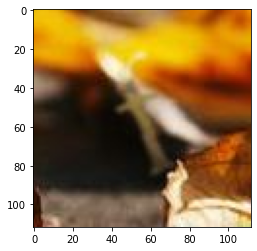

f
tf.Tensor(15, shape=(), dtype=int64)


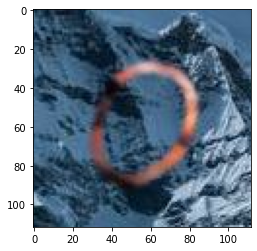

0
tf.Tensor(0, shape=(), dtype=int64)


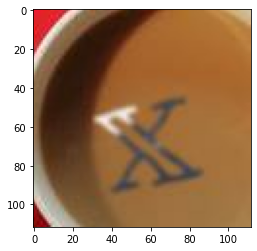

x
tf.Tensor(33, shape=(), dtype=int64)


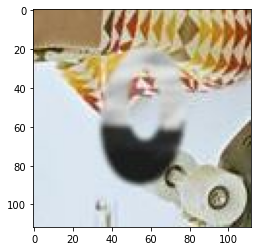

0
tf.Tensor(0, shape=(), dtype=int64)


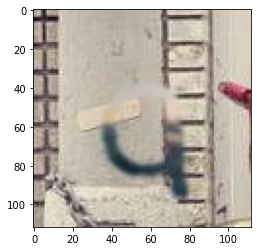

q
tf.Tensor(26, shape=(), dtype=int64)


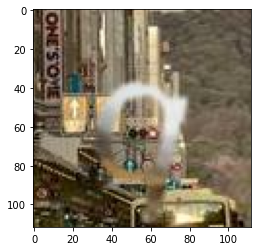

q
tf.Tensor(26, shape=(), dtype=int64)


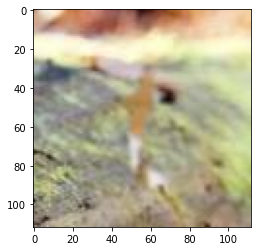

t
tf.Tensor(29, shape=(), dtype=int64)


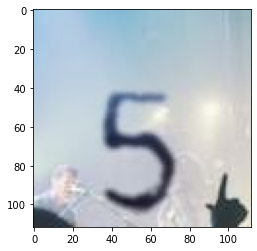

5
tf.Tensor(5, shape=(), dtype=int64)


In [4]:
train_ds = data_source.get_training_dataset()
for x, y in train_ds.take(10):
    plt.imshow(x)
    plt.show()
    print(data_source.classes[y])
    print(y)

### Build the pipeline

In [5]:
pipeline = pf.Pipeline(
    data_source=data_source,
    dataset_preprocessor=pf.preprocessing.CharImagesPreprocessor(
        desired_img_width=112,
        desired_img_height=112,
        batch_size=50,
        workers=4
    ),
    model=pf.models.EfficientNetB4(),
    metrics=["accuracy"],
    epochs=1
)

In [6]:
model = pipeline.run()

Preparing dataset of 6440 elements...
Preparing dataset of 560 elements...
Preparing dataset of 3000 elements...
[train] Steps per epoch: 129
[val] Steps per epoch: 12
[test] Steps per epoch: 60
129/129 [==============================] - 35s 139ms/step - loss: 6.6945 - accuracy: 0.1055 - val_loss: 4.9324 - val_accuracy: 0.3518


In [7]:
model.predict(
    data_source.get_testing_dataset()
)

array([[-0.2142 ,  3.88   , -0.2441 , ..., -0.258  , -0.2449 , -0.2507 ],
       [-0.2489 ,  4.414  , -0.1356 , ..., -0.2712 , -0.2583 , -0.2722 ],
       [-0.06018, -0.26   , -0.05414, ..., -0.1505 , -0.1685 , -0.164  ],
       ...,
       [-0.146  , -0.273  , -0.03955, ..., -0.1771 , -0.1995 , -0.19   ],
       [-0.1857 , -0.264  , -0.1268 , ..., -0.2666 , -0.2208 , -0.266  ],
       [-0.2698 , -0.1403 ,  4.29   , ..., -0.1774 , -0.2554 , -0.2715 ]],
      dtype=float16)

In [8]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [9]:
predictions = probability_model.predict(data_source.get_testing_dataset())

In [15]:
res = []
for r in predictions:
    res.append(tf.argmax(r).numpy())

In [13]:
predictions

array([[4.401e-04, 2.643e-02, 4.270e-04, ..., 4.213e-04, 4.268e-04,
        4.241e-04],
       [4.010e-04, 4.248e-02, 4.492e-04, ..., 3.922e-04, 3.972e-04,
        3.917e-04],
       [1.907e-06, 1.609e-06, 1.967e-06, ..., 1.788e-06, 1.729e-06,
        1.729e-06],
       ...,
       [3.242e-05, 2.855e-05, 3.606e-05, ..., 3.147e-05, 3.076e-05,
        3.105e-05],
       [4.725e-04, 4.370e-04, 5.012e-04, ..., 4.358e-04, 4.563e-04,
        4.361e-04],
       [1.192e-07, 1.192e-07, 9.894e-06, ..., 1.192e-07, 1.192e-07,
        1.192e-07]], dtype=float16)

In [16]:
res

[20,
 7,
 12,
 6,
 30,
 20,
 26,
 3,
 30,
 28,
 35,
 11,
 4,
 5,
 0,
 1,
 22,
 14,
 18,
 20,
 14,
 30,
 10,
 11,
 8,
 10,
 20,
 17,
 20,
 19,
 6,
 6,
 11,
 30,
 18,
 1,
 22,
 10,
 7,
 18,
 3,
 0,
 29,
 17,
 10,
 28,
 15,
 5,
 8,
 3,
 26,
 27,
 7,
 20,
 20,
 19,
 29,
 8,
 6,
 7,
 5,
 1,
 11,
 35,
 5,
 20,
 35,
 19,
 11,
 0,
 0,
 30,
 5,
 25,
 3,
 10,
 10,
 23,
 19,
 23,
 28,
 26,
 28,
 19,
 21,
 20,
 30,
 17,
 26,
 28,
 31,
 20,
 6,
 20,
 14,
 3,
 14,
 1,
 20,
 14,
 10,
 3,
 24,
 5,
 23,
 7,
 2,
 6,
 20,
 3,
 31,
 10,
 22,
 8,
 35,
 3,
 5,
 3,
 26,
 17,
 22,
 30,
 35,
 31,
 20,
 7,
 1,
 5,
 19,
 5,
 14,
 11,
 10,
 10,
 22,
 29,
 20,
 10,
 9,
 27,
 6,
 1,
 11,
 29,
 22,
 32,
 19,
 5,
 19,
 1,
 29,
 10,
 20,
 2,
 5,
 20,
 0,
 30,
 30,
 6,
 3,
 1,
 3,
 3,
 1,
 6,
 20,
 3,
 5,
 16,
 1,
 5,
 33,
 23,
 21,
 30,
 14,
 12,
 11,
 20,
 11,
 20,
 20,
 0,
 26,
 12,
 22,
 18,
 20,
 11,
 24,
 20,
 8,
 5,
 1,
 16,
 22,
 3,
 0,
 28,
 32,
 8,
 28,
 5,
 22,
 23,
 0,
 32,
 14,
 28,
 20,
 6,
 10,
 2,
 31,
